

#Step 1. Cleaning and preprocessing the data


In [ ]:
import pandas as pd

# Read the CSV file
data = pd.read_csv("GB_dayahead_pricedata.csv", delimiter=",")
print(data.columns)  # Debugging: Check column names

# Reshape the data to a time-series format
reshaped_data = pd.melt(
    data,
    id_vars=["Delivery Period (EET)"],
    var_name="date",
    value_name="price"
)

# Clean the `date` column to remove unwanted text
reshaped_data["date"] = reshaped_data["date"].str.replace(r"\s\(.*\)", "", regex=True)

# Combine `date` and `Delivery Period (EET)` into a single timestamp
reshaped_data["timestamp"] = pd.to_datetime(
    reshaped_data["date"] + " " + reshaped_data["Delivery Period (EET)"].str[:5],
    format="%Y-%m-%d %H:%M"
)

# Step 1: Replace commas with periods in the 'price' column
reshaped_data['price'] = reshaped_data['price'].str.replace(',', '.', regex=False)

# Step 2: Convert 'price' column to numeric (float)
reshaped_data['price'] = pd.to_numeric(reshaped_data['price'])

# Drop unnecessary columns
reshaped_data = reshaped_data[["timestamp", "price"]]

# Sort the data by the timestamp
reshaped_data = reshaped_data.sort_values(by="timestamp").reset_index(drop=True)

# Save the cleaned and sorted data
reshaped_data.to_csv("GB_dayahead_pricedata_cleaned.csv", index=False)

print(reshaped_data.head())


Index(['Delivery Period (EET)', '2024-12-08 (GWP/Mwh)', '2024-12-07 (GWP/Mwh)',
       '2024-12-06 (GWP/Mwh)', '2024-12-05 (GWP/Mwh)', '2024-12-04 (GWP/Mwh)',
       '2024-12-03 (GWP/Mwh)', '2024-12-02 (GWP/Mwh)'],
      dtype='object')
            timestamp  price
0 2024-12-02 00:00:00  30.18
1 2024-12-02 01:00:00  31.40
2 2024-12-02 02:00:00  31.63
3 2024-12-02 03:00:00  31.58
4 2024-12-02 04:00:00  31.61


In [ ]:
# Read the CSV file
data = pd.read_csv("GB_intraday_pricedata.csv", delimiter=",")
print(data.columns)  # Debugging: Check column names

# Reshape the data to a time-series format
reshaped_data = pd.melt(
    data,
    id_vars=["Delivery Period (EET)"],
    var_name="date",
    value_name="price"
)

# Clean the `date` column to remove unwanted text
reshaped_data["date"] = reshaped_data["date"].str.replace(r"\s\(.*\)", "", regex=True)

# Combine `date` and `Delivery Period (EET)` into a single timestamp
reshaped_data["timestamp"] = pd.to_datetime(
    reshaped_data["date"] + " " + reshaped_data["Delivery Period (EET)"].str[:5],
    format="%Y-%m-%d %H:%M"
)

# Step 1: Replace commas with periods in the 'price' column
reshaped_data['price'] = reshaped_data['price'].str.replace(',', '.', regex=False)

# Step 2: Convert 'price' column to numeric (float)
reshaped_data['price'] = pd.to_numeric(reshaped_data['price'])

# Drop unnecessary columns
reshaped_data = reshaped_data[["timestamp", "price"]]

# Sort the data by the timestamp
reshaped_data = reshaped_data.sort_values(by="timestamp").reset_index(drop=True)

# Save the cleaned and sorted data
reshaped_data.to_csv("GB_intraday_pricedata_cleaned.csv", index=False)

print(reshaped_data.head())


Index(['Delivery Period (EET)', '2024-12-08 (GWP/Mwh)', '2024-12-07 (GWP/Mwh)',
       '2024-12-06 (GWP/Mwh)', '2024-12-05 (GWP/Mwh)', '2024-12-04 (GWP/Mwh)',
       '2024-12-03 (GWP/Mwh)', '2024-12-02 (GWP/Mwh)'],
      dtype='object')
            timestamp  price
0 2024-12-02 00:00:00  85.09
1 2024-12-02 00:30:00  85.07
2 2024-12-02 01:00:00  68.99
3 2024-12-02 01:30:00  65.34
4 2024-12-02 02:00:00  58.63


# Step 2. Data analysis

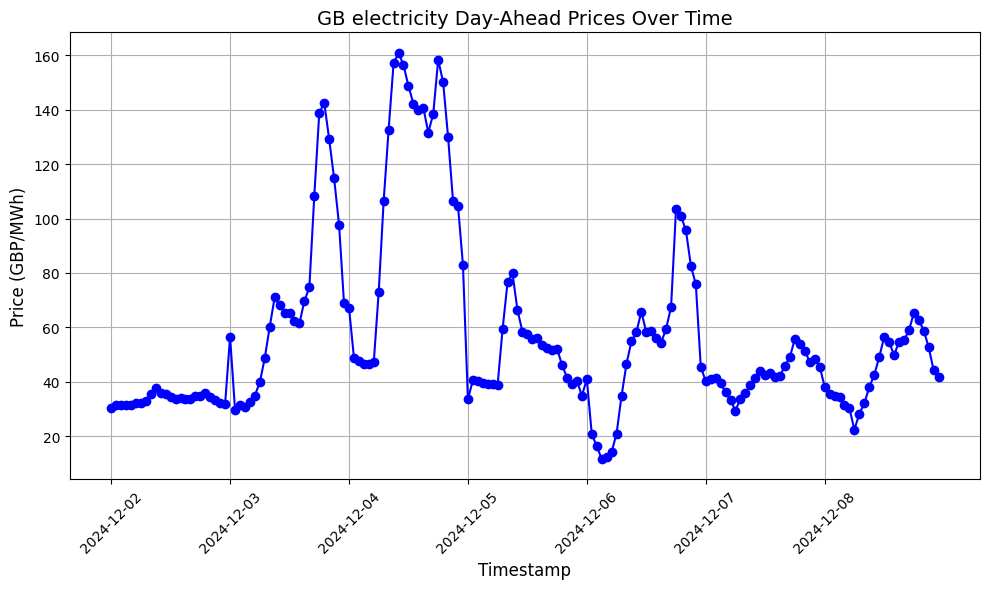

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the cleaned data
df_dayahead = pd.read_csv("GB_dayahead_pricedata_cleaned.csv")

# Convert the 'timestamp' column to datetime format (if not already)
df_dayahead['timestamp'] = pd.to_datetime(df_dayahead['timestamp'])

# Plotting the price vs timestamp
plt.figure(figsize=(10, 6))
plt.plot(df_dayahead['timestamp'], df_dayahead['price'], marker='o', linestyle='-', color='b')

# Formatting the plot
plt.title('GB electricity Day-Ahead Prices Over Time', fontsize=14)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Price (GBP/MWh)', fontsize=12)

# Format the x-axis to show only the date part (YYYY-MM-DD)
plt.xticks(
    df_dayahead['timestamp'][::24],  # Select every 24th timestamp to avoid clutter
    rotation=45,
    labels=df_dayahead['timestamp'][::24].dt.strftime('%Y-%m-%d')
)

plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


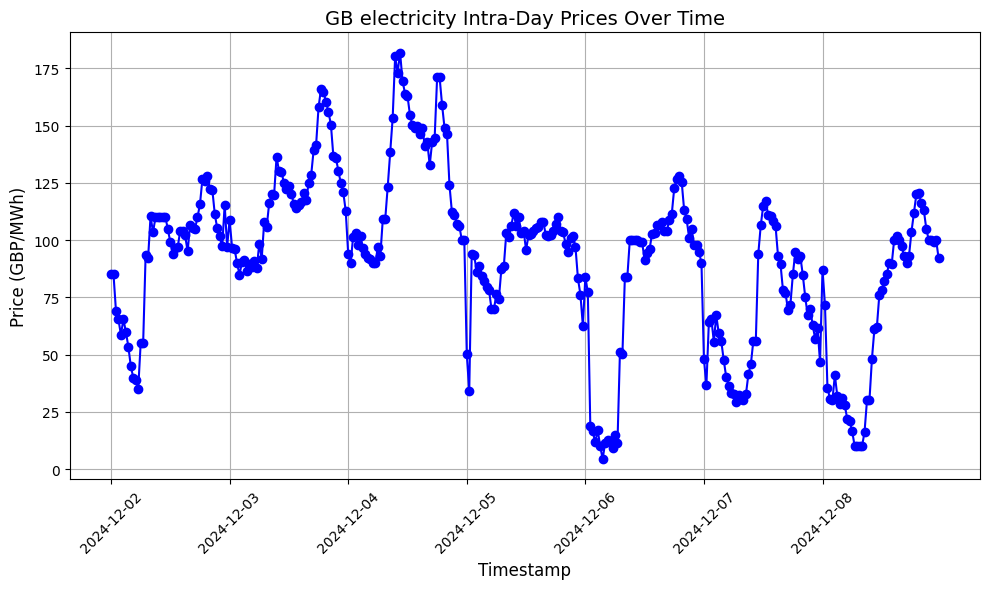

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the cleaned data
df_intraday = pd.read_csv("GB_intraday_pricedata_cleaned.csv")

# Convert the 'timestamp' column to datetime format (if not already)
df_intraday['timestamp'] = pd.to_datetime(df_intraday['timestamp'])

# Plotting the price vs timestamp
plt.figure(figsize=(10, 6))
plt.plot(df_intraday['timestamp'], df_intraday['price'], marker='o', linestyle='-', color='b')

# Formatting the plot
plt.title('GB electricity Intra-Day Prices Over Time', fontsize=14)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Price (GBP/MWh)', fontsize=12)

# Format the x-axis to show only the date part (YYYY-MM-DD)
plt.xticks(
    df_intraday['timestamp'][::48],  # Select every 24th timestamp to avoid clutter
    rotation=45,
    labels=df_intraday['timestamp'][::48].dt.strftime('%Y-%m-%d')
)

plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

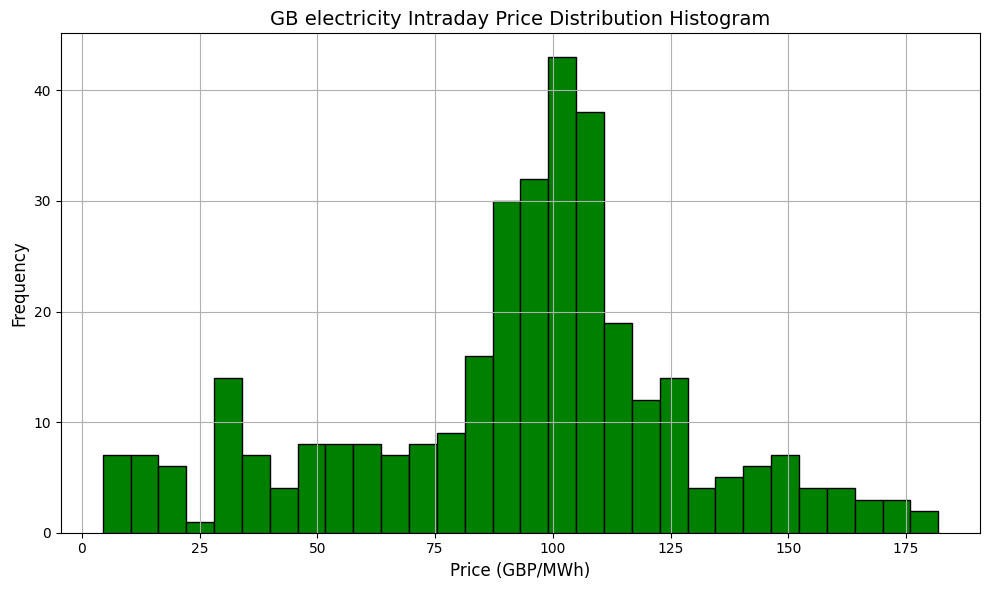

In [ ]:
#heatmap plot and histogram

plt.figure(figsize=(10, 6))
plt.hist(df_intraday['price'], bins=30, color='green', edgecolor='black')

# Formatting the plot
plt.title('GB electricity Intraday Price Distribution Histogram', fontsize=14)
plt.xlabel('Price (GBP/MWh)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()



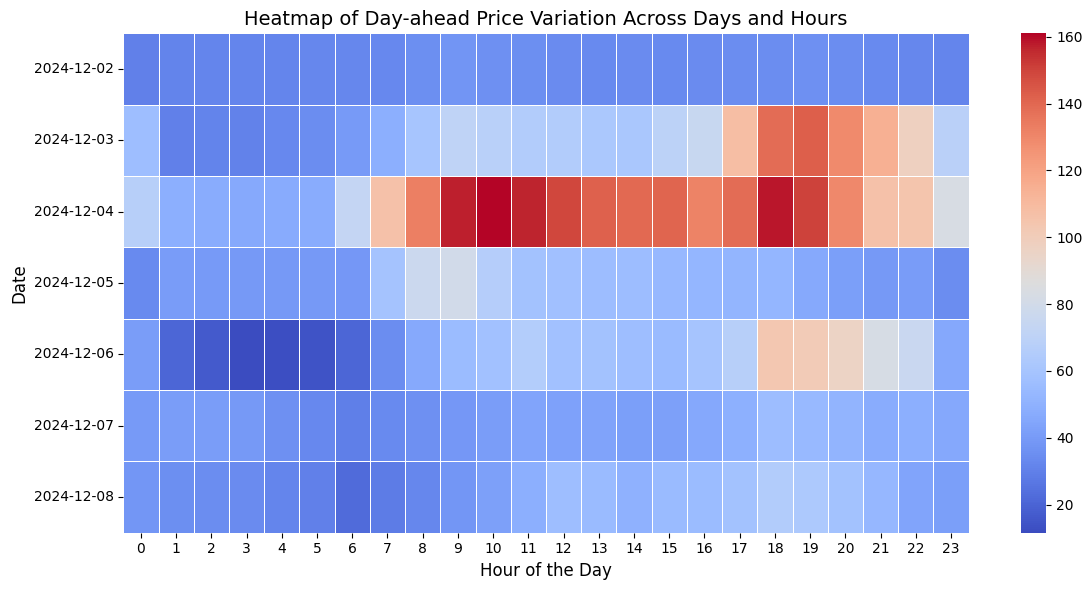

In [ ]:
import seaborn as sns

# Create hour and date columns
df_dayahead['hour'] = df_dayahead['timestamp'].dt.hour
df_dayahead['date'] = df_dayahead['timestamp'].dt.date

# Pivot the data to have 'date' as rows and 'hour' as columns
pivot_data = df_dayahead.pivot(index="date", columns="hour", values="price")

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)

plt.title('Heatmap of Day-ahead Price Variation Across Days and Hours', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Date', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


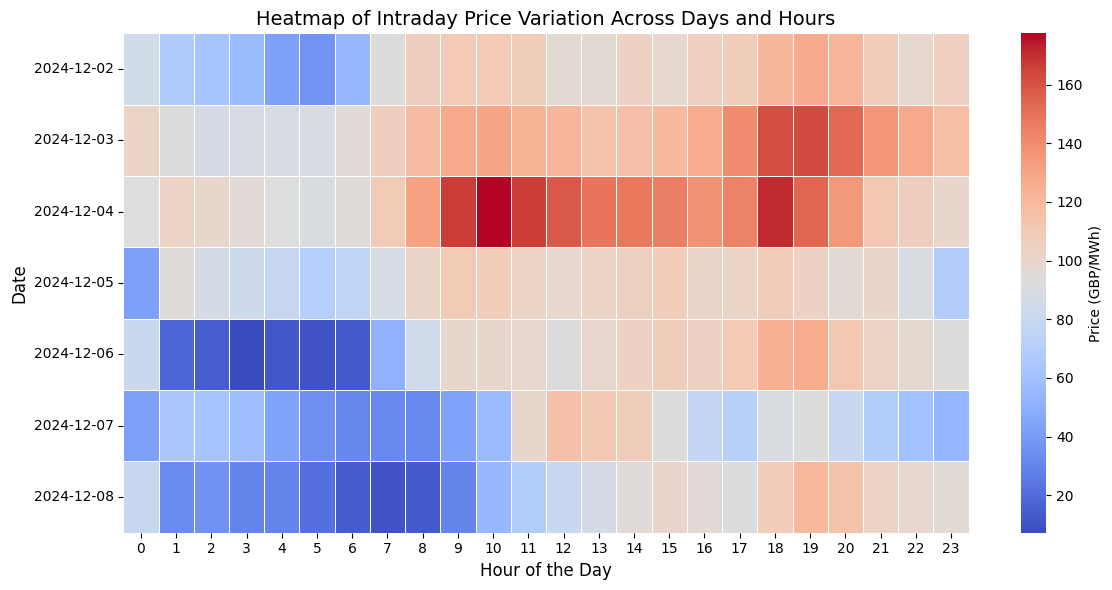

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create hour and date columns
df_intraday['hour'] = df_intraday['timestamp'].dt.hour
df_intraday['date'] = df_intraday['timestamp'].dt.date

# Handle duplicates by taking the average price for duplicate date-hour combinations
df_intraday = df_intraday.groupby(["date", "hour"], as_index=False).mean()

# Pivot the data to have 'date' as rows and 'hour' as columns
pivot_data = df_intraday.pivot(index="date", columns="hour", values="price")

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Price (GBP/MWh)'})

plt.title('Heatmap of Intraday Price Variation Across Days and Hours', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Date', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


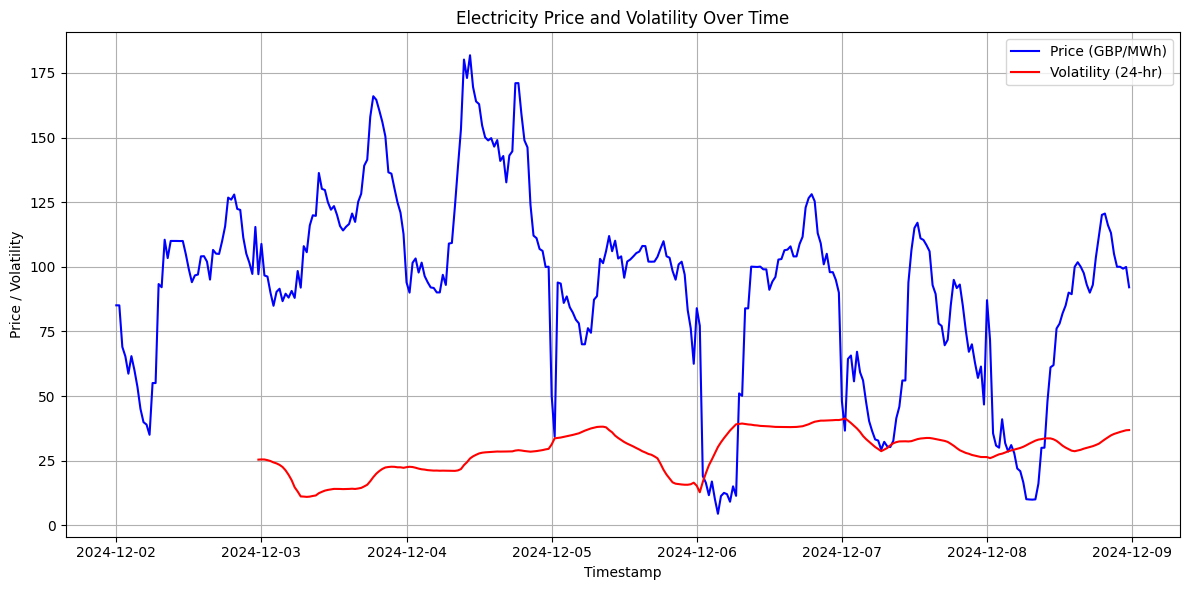

In [ ]:
#volatility analysis

# Read the preprocessed data
df_intraday = pd.read_csv("GB_intraday_pricedata_cleaned.csv")
df_intraday['timestamp'] = pd.to_datetime(df_intraday['timestamp'])

# Calculate hourly price changes
df_intraday['price_change'] = df_intraday['price'].diff()

# Calculate rolling volatility (e.g., 24-hour standard deviation)
df_intraday['volatility'] = df_intraday['price'].rolling(window=48).std()

# Plot price and volatility
plt.figure(figsize=(12, 6))
plt.plot(df_intraday['timestamp'], df_intraday['price'], label='Price (GBP/MWh)', color='blue')
plt.plot(df_intraday['timestamp'], df_intraday['volatility'], label='Volatility (24-hr)', color='red')
plt.title('Electricity Price and Volatility Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Price / Volatility')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


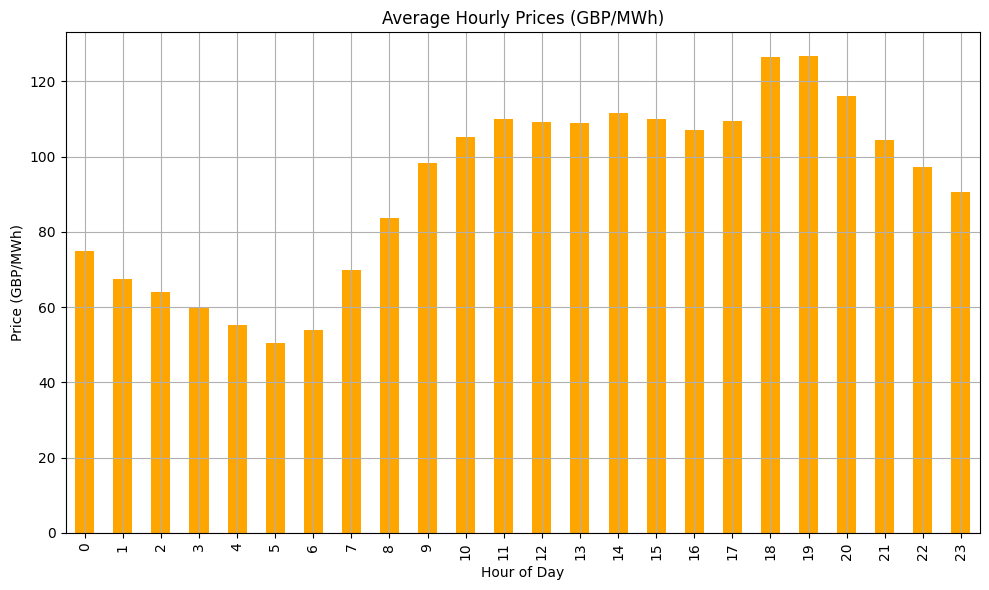

Cheapest hour: 5:00 with average price of 50.45 GBP/MWh
Most expensive hour: 19:00 with average price of 126.69 GBP/MWh


In [ ]:
# Add hour and day columns for grouping
df_intraday['hour'] = df_intraday['timestamp'].dt.hour
df_intraday['date'] = df_intraday['timestamp'].dt.date

# Find average prices by hour
avg_hourly_prices = df_intraday.groupby('hour')['price'].mean()

# Plot average hourly prices
plt.figure(figsize=(10, 6))
avg_hourly_prices.plot(kind='bar', color='orange')
plt.title('Average Hourly Prices (GBP/MWh)')
plt.xlabel('Hour of Day')
plt.ylabel('Price (GBP/MWh)')
plt.grid()
plt.tight_layout()
plt.show()

# Highlight best and worst trading hours
min_price_hour = avg_hourly_prices.idxmin()
max_price_hour = avg_hourly_prices.idxmax()

print(f"Cheapest hour: {min_price_hour}:00 with average price of {avg_hourly_prices[min_price_hour]:.2f} GBP/MWh")
print(f"Most expensive hour: {max_price_hour}:00 with average price of {avg_hourly_prices[max_price_hour]:.2f} GBP/MWh")


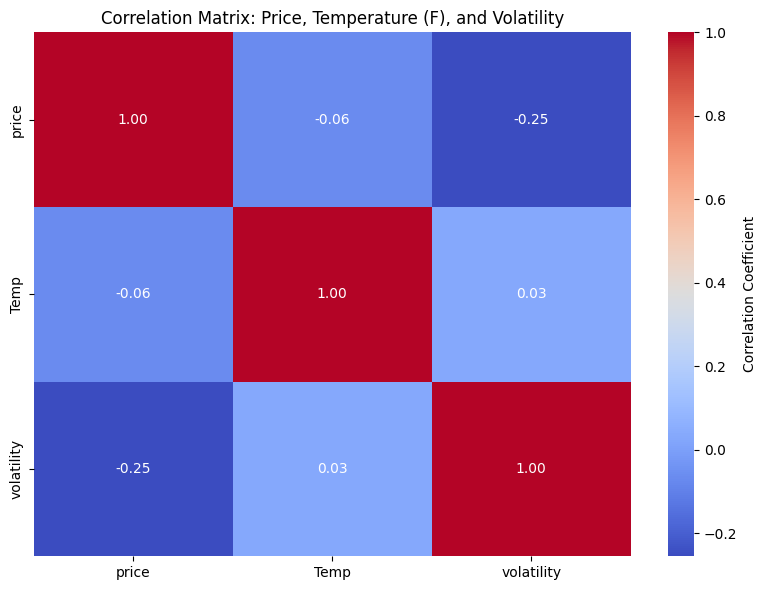

In [ ]:
# Ensure 'timestamp' is in datetime format
df_intraday['timestamp'] = pd.to_datetime(df_intraday['timestamp'])

# Extract 'hour' from the 'timestamp' column
df_intraday['hour'] = df_intraday['timestamp'].dt.hour

# Compute hourly price volatility for inclusion in analysis
df_intraday['volatility'] = df_intraday.groupby('hour')['price'].transform('std')

# Compute correlation matrix with price, temperature, and volatility
correlation_matrix = df_intraday[['price', 'Temp', 'volatility']].corr()

# Plot correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Matrix: Price, Temperature (F), and Volatility')
plt.tight_layout()
plt.show()

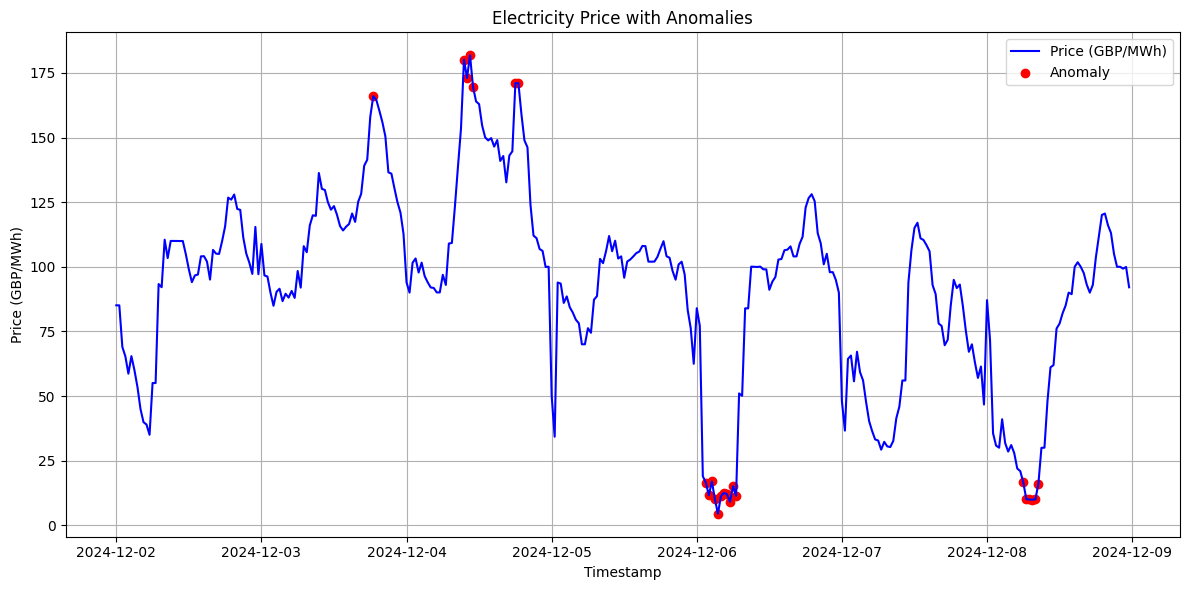

In [ ]:
# Identify anomalies (e.g., price > 2 standard deviations from mean)
mean_price = df_intraday['price'].mean()
std_price = df_intraday['price'].std()
df_intraday['anomaly'] = (df_intraday['price'] > mean_price + 2 * std_price) | (df_intraday['price'] < mean_price - 2 * std_price)

# Plot anomalies
plt.figure(figsize=(12, 6))
plt.plot(df_intraday['timestamp'], df_intraday['price'], label='Price (GBP/MWh)', color='blue')
plt.scatter(df_intraday['timestamp'][df_intraday['anomaly']], df_intraday['price'][df_intraday['anomaly']], color='red', label='Anomaly')
plt.title('Electricity Price with Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Price (GBP/MWh)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


# Step 3. Physical Significance of These Analyses
1. Hourly Averages: Identifies peak and off-peak electricity demand patterns, helping to understand market dynamics.

2. Daily Trends: Highlights how external factors (e.g., weather or demand shifts) impact prices on different days.

3. Heatmap: Visualizes how electricity prices evolve hour by hour across the week, identifying consistent trends or anomalies.

4. Volatility Analysis: Reveals hours of the day prone to sudden price changes, crucial for trading strategies.

5. Correlation Matrix: Shows the similarity of price patterns between days, useful for forecasting and model validation.

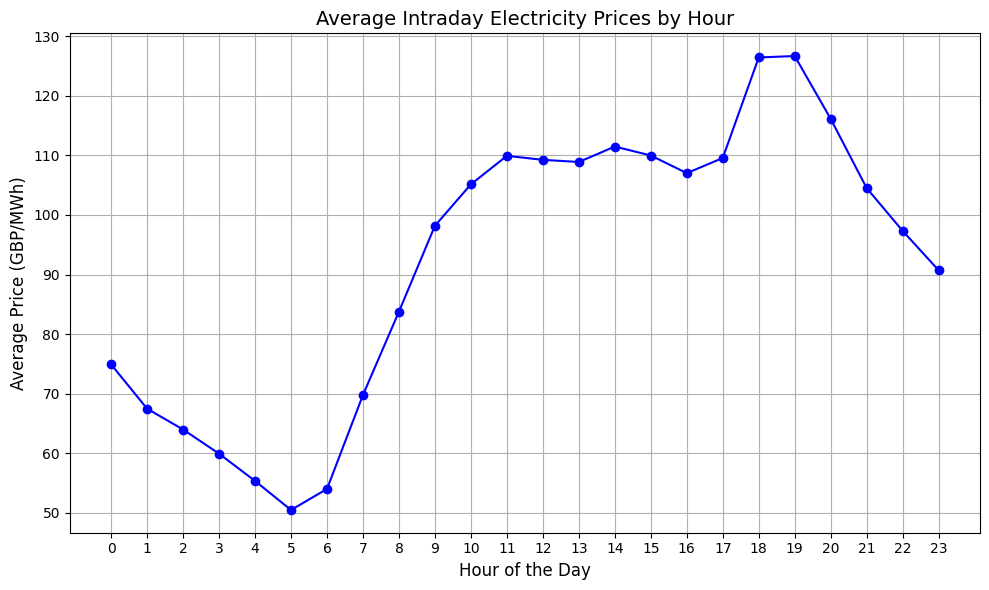

In [ ]:
# Calculate the average price for each hour across the week
hourly_avg_prices = df_intraday.groupby("hour")["price"].mean()

# Plot the hourly average prices
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg_prices.index, hourly_avg_prices.values, marker='o', linestyle='-', color='b')
plt.title('Average Intraday Electricity Prices by Hour', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Price (GBP/MWh)', fontsize=12)
plt.grid(True)
plt.xticks(range(0, 24))  # Show all 24 hours
plt.tight_layout()
plt.show()


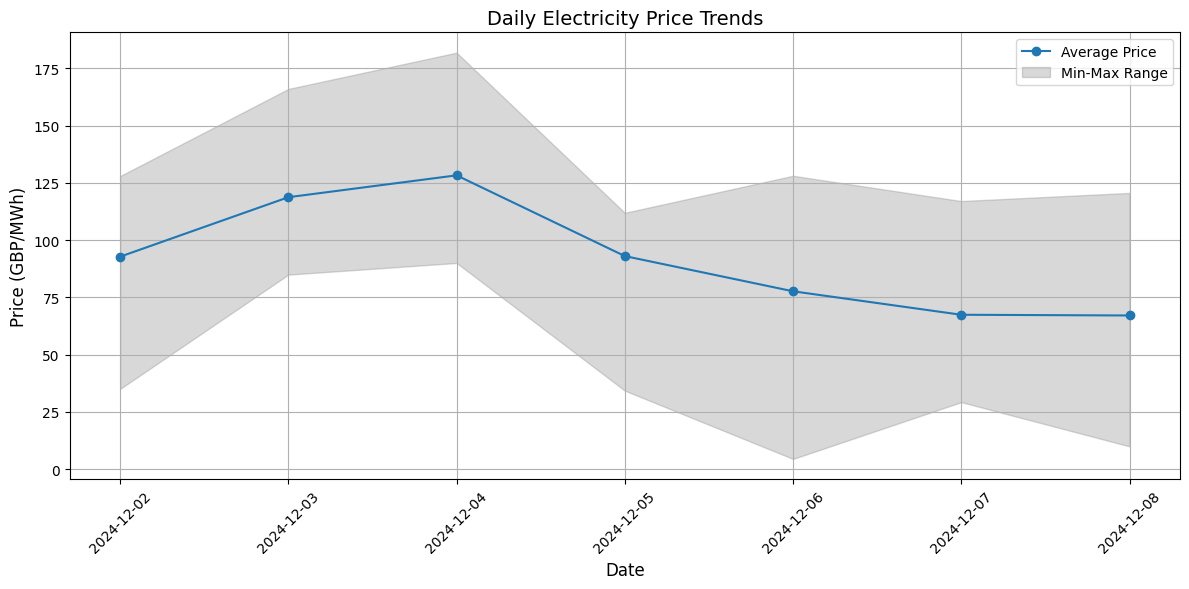

In [ ]:
# Calculate daily statistics
daily_stats = df_intraday.groupby("date")["price"].agg(['mean', 'min', 'max'])

# Plot daily statistics
plt.figure(figsize=(12, 6))
plt.plot(daily_stats.index, daily_stats['mean'], marker='o', label='Average Price')
plt.fill_between(daily_stats.index, daily_stats['min'], daily_stats['max'], color='gray', alpha=0.3, label='Min-Max Range')
plt.title('Daily Electricity Price Trends', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (GBP/MWh)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


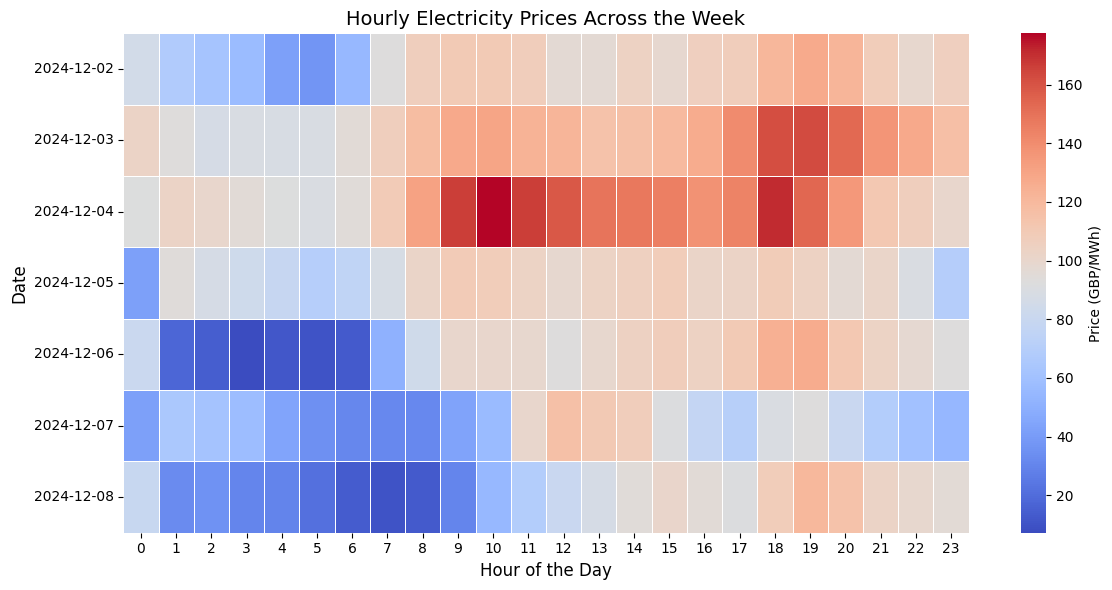

In [ ]:
# Handle duplicates by taking the average price for duplicate date-hour combinations
df_intraday_grouped = df_intraday.groupby(["date", "hour"], as_index=False).mean()

# Pivot the data for the heatmap
pivot_data = df_intraday_grouped.pivot(index="date", columns="hour", values="price")

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Price (GBP/MWh)'})
plt.title('Hourly Electricity Prices Across the Week', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Date', fontsize=12)
plt.tight_layout()
plt.show()


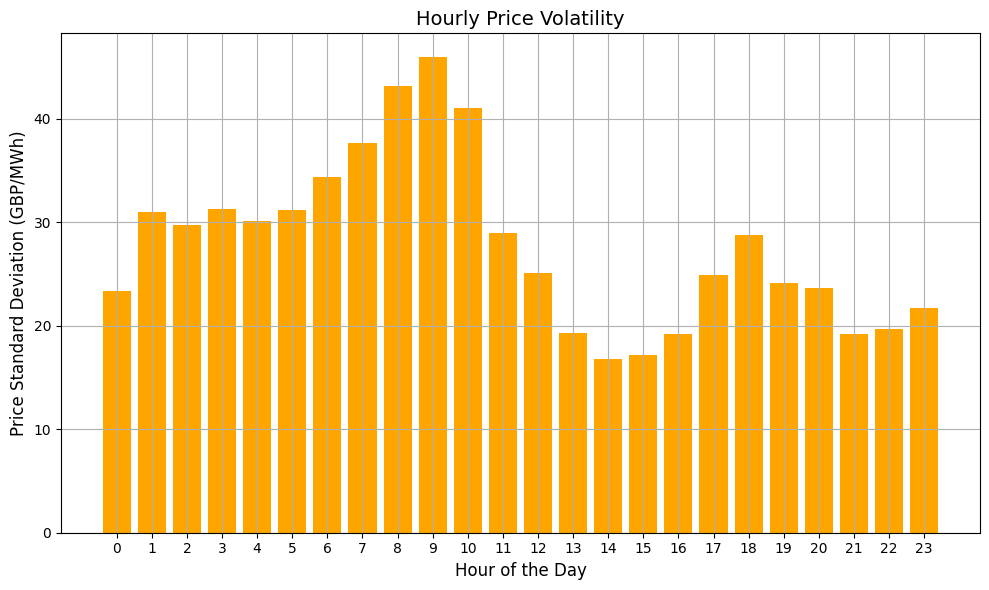

In [ ]:
# Calculate hourly price volatility
hourly_volatility = df_intraday.groupby("hour")["price"].std()

# Plot hourly volatility
plt.figure(figsize=(10, 6))
plt.bar(hourly_volatility.index, hourly_volatility.values, color='orange')
plt.title('Hourly Price Volatility', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Price Standard Deviation (GBP/MWh)', fontsize=12)
plt.grid(True)
plt.xticks(range(0, 24))  # Show all 24 hours
plt.tight_layout()
plt.show()


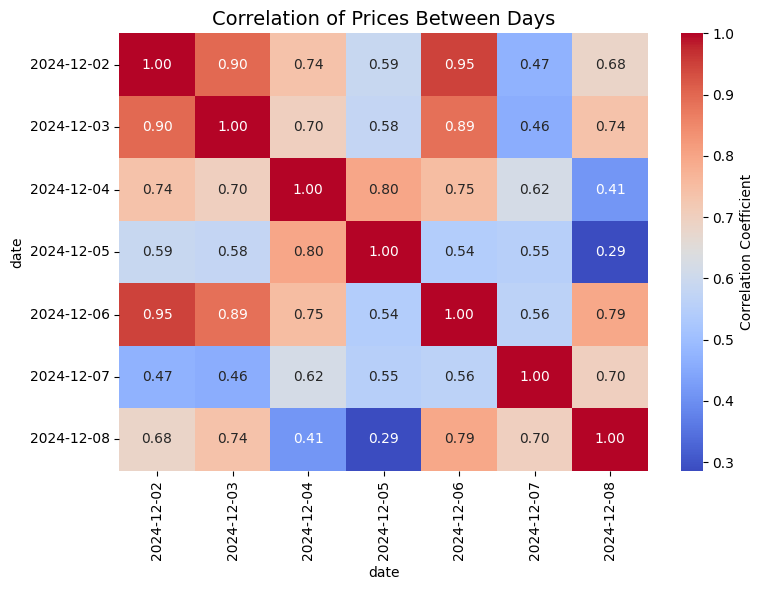

In [ ]:
# Pivot data for correlation analysis
correlation_data = df_intraday_grouped.pivot(index="hour", columns="date", values="price")

# Compute the correlation matrix
corr_matrix = correlation_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation of Prices Between Days', fontsize=14)
plt.tight_layout()
plt.show()
